# Root Finding: Newton's Method (Newton-Raphson)
---

GENERAL PROBLEM: find the real roots of a given function $f(x)$ in the case when closed-form solutions are not available. That is, find the values of $x$ that satisfy the equation

\begin{align}
  f(x) = 0
\end{align}

where $x$ is a real variable, and $f(x)$ is some non-linear function.

IDEA: use knowledge of both the function and its derivative to construct successive approximations to the actual root of the function. 

PRE-REQUISITES:
- Bisection method
- Secant method
- Method of false position

REFERENCES:
- [1] Burden and Faires, *Numerical Analysis, 7th edition*.
- [2] Ralston and Rabinowitz, *A First Course in Numerical Analysis, 2nd edition*.
- [3] Press et al, *Numerical Recipes: the Art of Scientific Computing, 3rd edition*.
- [4] Stoer and Bulirsch, *Introduction to Numerical Analysis, 2nd edition*.

## 1. Summary of the method

The Newton-Raphson method generates successive approximations to the root of a function from knowledge of both the function and its first derivative. Starting with an initial guess, one constructs the tangent line to the function at that point and uses the root of the tangent line as the next approximation to the root of the function. This process is continued until the root is located to within some given tolerance, or alternatively when the maximum allowed number of iterations is reached. (NOTE: we are essentially replacing a difficult non-linear problem with a sequence of simpler linear problems!)
 
To start the method, let $x_{0}$ be an initial guess for the root of $f(x)$. A Taylor series expansion of $f(x)$ around the initial guess is

\begin{align}
  f(x) = f(x_{0}) + (x - x_{0})f'(x_{0}) + \mathcal{O}(x^2).
\end{align}

Keeping only terms to linear order gives the equation for the line tangent to $f(x)$ at $x_{0}$, which is given by

\begin{align}
  g_{1}(x) = f(x_{0}) + (x - x_{0})f'(x_{0}).
\end{align}

The root of this line is taken as the next approximation to the root of $f(x)$, yielding

\begin{align}
  x_{1} = x_{0} - \frac{f(x_{0})}{f'(x_{0})}.
\end{align}

The approximant of the root after the $i$th iteration is

\begin{align}
  x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}.
\end{align}

As in previous methods, we take the relative uncertainty in the location of the root at the end of an iteration to be

\begin{align}
  \mathsf{REL}
  = \left|\frac{\text{(current approximant)} - \text{(previous approximant)}}{\text{(current approximant)}}\right|
  = \left|\frac{x_{i+1} - x_{i}}{x_{i+1}}\right|
\end{align}

We also calculate the error  

\begin{align}
  \mathsf{ABS} = \left|f(x_{i+1})\right|
\end{align}

In the algorithm below, the process of searching for a root continues until both of these errors are less than some specified tolerance (or the maximum allowed number of iterations is reached).

The Newton-Raphson method converges faster than any of the previous methods, however it has well-known vulerabilities. If an approximant gets too close to an extremum with vanishing slope, the next approximant can get kicked far from the root that is being searched for, which the method is unlikely to recover from. A second pitfall is that the routine can sometimes get stuck in a loop, where the same two approximants alternate back and forth, and the true root is never approached any nearer. Both of these pitfalls are often avoided by augmenting Newton-Raphson with an always-converging root finding method such as bisection or false position.

## 2. Algorithm

**INPUT**
- x0, an initial guess for the root of the function in question.
- TOL, the relative error tolerance that the answer is required to have.
- $i_\mathrm{max}$, maximum number of iterations allowed.

**Initialize loop**
- set $i = 0$

**Loop** while $i \leq i_\mathrm{max}$


- calculate root of the tanget line: $x_{i+1} = x_{i} - f(x_{i})/f'(x_{i})$


- calculate the relative uncertainty using:  REL $= \left|(x_{i+1} - x_{i})/x_{i+1}\right|$


- calculate ABS $= |f(x_{i+1})|$


- if (REL $\leq$ TOL) and (ABS $\leq$ TOL), stop. Otherwise, continue.


- i = i + 1



**Max iterations reached**
- Print message that max iterations have been reached, and stop.

**OUTPUT**

root found, or message of failure

## 3. CODE:

In [7]:
%%writefile newton_raphson.py
import numpy as np
import sys
def newton_raphson(f, df, x0, TOL, imax):
    """
    Function that searches for roots of f(x) using the Newton-Raphson method.
    
    INPUT
    f    : function whose roots are being sought 
    df   : first derivative of function whose roots are being sought
    x0   : initial guess for root
    TOL  : allowed tolerance
    imax : maximum number of iterations
    
    OUTPUT
    location of the root to within the allowed tolerance, or failure message
    
    """
    
    # initialize iteration
    xOld = x0 # set initial approximant
    print('iteration',0,': initial guess for location of root at',x0)
    
    # iterate search using method of false position
    i = 0  # reset iteration number
    while i <= imax:
    
        # update approximate location of root
        xNew = xOld - f(xOld)/df(xOld)
        print('iteration',i,': approximate location of root at',xNew)
    
        # calculate errors
        xErr = np.abs(xNew - xOld)
        REL  = xErr/np.abs(xNew)
        ABS  = np.abs(f(xNew))

        # check if errors are within the allowed tolerance
        if (REL <= TOL and ABS <= TOL):
            best   = xNew #best estimate
            uncert = xErr #uncertainty
            print('SUCCESS! Root has been located to within the specified tolerance after',i,'iterations.')
            print('Root is located at',best,'+/-',uncert)
            return
        
        # rotate approximants
        xOld = xNew

        # increment iteration number
        i = i + 1
                
    # print message that max iteration has been reached
    print('FAIL! Max number of iterations has been reached. Stopping.')
    return

Overwriting newton_raphson.py


In [8]:
%run newton_raphson.py

## 4. A simple example

In [9]:
# define function whose roots we are searching for
def myfunc(x):
    return np.cos(x) - x

# define function whose roots we are searching for
def der_myfunc(x):
    return -np.sin(x) - 1

<IPython.core.display.Javascript object>


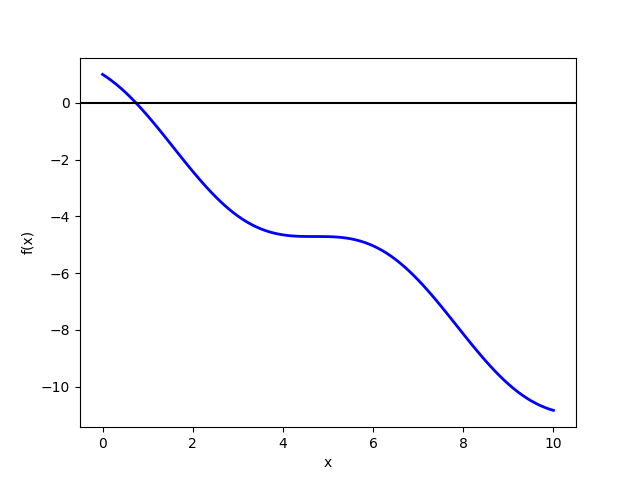

In [10]:
# plot function
%matplotlib notebook
import matplotlib.pyplot as plt
x = np.linspace(0,10,101)
plt.plot(x, myfunc(x), 'b-', linewidth=2)
plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [15]:
newton_raphson(myfunc, der_myfunc, 3., 1e-3, 100)

iteration 0 : initial guess for location of root at 3.0
iteration 1 : approximate location of root at -0.4965581782973314
iteration 2 : approximate location of root at 2.131003844480995
iteration 3 : approximate location of root at 0.6896627207783732
iteration 4 : approximate location of root at 0.7396529975313338
iteration 5 : approximate location of root at 0.7390852043758361
SUCCESS! Root has been located to within the specified tolerance after 5 iterations.
Root is located at 0.7390852043758361 +/- 0.0005677931554977089


## 5. A more stubborn example

In [5]:
# define function whose roots we are searching for
def myfunc2(x):
    return np.exp(-x) - 0.1

def der_myfunc2(x):
    return -np.exp(-x)

<IPython.core.display.Javascript object>


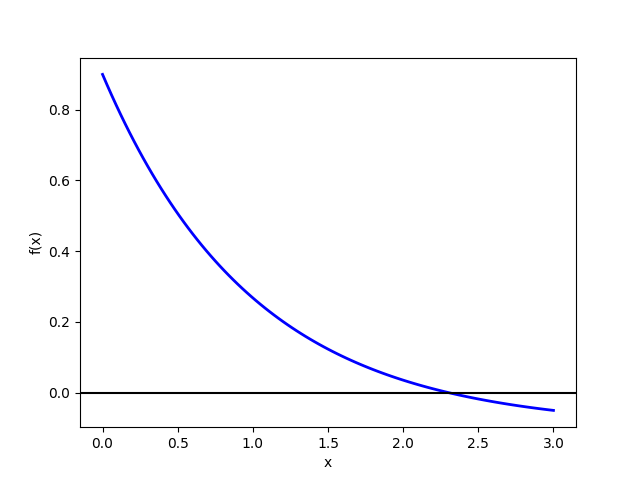

In [17]:
# plot function
%matplotlib notebook
import matplotlib.pyplot as plt
x = np.linspace(0,3,101)
plt.plot(x, myfunc2(x), 'b-', linewidth=2)
plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [18]:
newton_raphson(myfunc2, der_myfunc, 2, 1e-3, 100)

iteration 0 : initial guess for location of root at 2
iteration 1 : approximate location of root at 2.0185069558781943
iteration 2 : approximate location of root at 2.035785262927597
iteration 3 : approximate location of root at 2.0519313585773715
iteration 4 : approximate location of root at 2.0670317879448046
iteration 5 : approximate location of root at 2.0811645700075387
iteration 6 : approximate location of root at 2.0944003247785363
iteration 7 : approximate location of root at 2.1068032107747356
iteration 8 : approximate location of root at 2.118431710573664
iteration 9 : approximate location of root at 2.1293392937250633
iteration 10 : approximate location of root at 2.1395749798889376
iteration 11 : approximate location of root at 2.149183820224927
iteration 12 : approximate location of root at 2.1582073113501115
iteration 13 : approximate location of root at 2.1666837533206125
iteration 14 : approximate location of root at 2.1746485608653434
iteration 15 : approximate locatio